In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

import csv


In [2]:
#diamonds = sns.load_dataset('diamonds')
#print(f'Number of diamonds: {diamonds.shape[0]:,}\n'
#      f"Diamond cut types: {diamonds['cut'].unique().tolist()}\n"
#      f"Diamond colors:     {sorted(diamonds['color'].unique().tolist())}\n\n"
#      f'{diamonds.head(3)}\n')

In [3]:
import numpy as np
import pandas as pd

# 生成随机数据
np.random.seed(42)
n = 53940
carat = np.random.normal(0.8, 0.5, n)
price = 5000 + carat*10000 + np.random.normal(0, 1000, n)
cut = np.random.choice(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], n)
color = np.random.choice(['D', 'E', 'F', 'G', 'H', 'I', 'J'], n)
clarity = np.random.choice(['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF'], n)
length = np.random.normal(5.6, 1, n)
width = np.random.normal(5.6, 1, n)
depth = np.random.normal(3.5, 0.5, n)
depth_pct = depth / (np.mean([length, width]) / 2) * 100
table = np.random.normal(57, 2, n)

# 将数据转换为pandas数据框
diamonds = pd.DataFrame({'price': price,
                         'carat': carat,
                         'cut': cut,
                         'color': color,
                         'clarity': clarity,
                         'x': length,
                         'y': width,
                         'z': depth,
                         'depth': depth_pct,
                         'table': table})
print(f'Number of diamonds: {diamonds.shape[0]:,}\n'
      f"Diamond cut types: {diamonds['cut'].unique().tolist()}\n"
      f"Diamond colors:     {sorted(diamonds['color'].unique().tolist())}\n\n"
      f'{diamonds.head(3)}\n')

Number of diamonds: 53,940
Diamond cut types: ['Premium', 'Very Good', 'Ideal', 'Fair', 'Good']
Diamond colors:     ['D', 'E', 'F', 'G', 'H', 'I', 'J']

          price     carat        cut color clarity         x         y   
0  15938.104237  1.048357    Premium     I     SI2  4.781328  5.323430  \
1  12671.681588  0.730868    Premium     I     VS1  5.948151  4.614903   
2  15738.918722  1.123844  Very Good     G    VVS2  6.468198  7.414706   

          z       depth      table  
0  3.415362  122.012596  56.948446  
1  3.959237  141.442335  56.821283  
2  3.016101  107.749126  53.350709  



In [4]:
df = diamonds[((diamonds['cut']=='Ideal')|(diamonds['cut']=='Premium')) & (diamonds['carat']>2)]
print(f'Number of diamonds in "df": {df.shape[0]:,}')


Number of diamonds in "df": 175


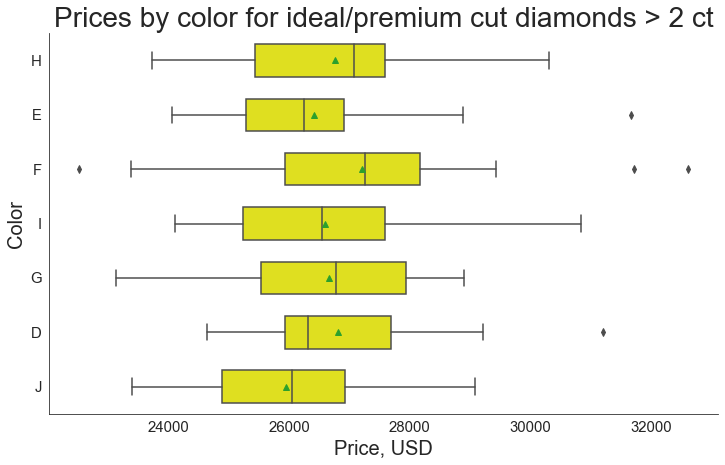

In [5]:
sns.set_style('white')
plt.figure(figsize=(12, 7))
sns.boxplot(x='price', y='color', data=df, color='yellow', width=0.6, showmeans=True)
# Create a function to customize the axes of all the subsequent graphs in a uniform way.
def add_cosmetics(title='Prices by color for ideal/premium cut diamonds > 2 ct', 
                  xlabel='Price, USD', ylabel='Color'):
    plt.title(title, fontsize=28)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    sns.despine()
add_cosmetics()

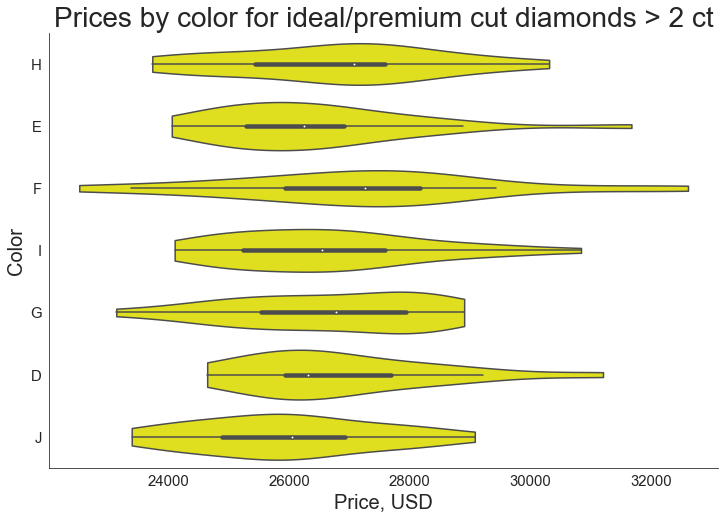

In [6]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='price', y='color', data=df, color='yellow', cut=0)
add_cosmetics()


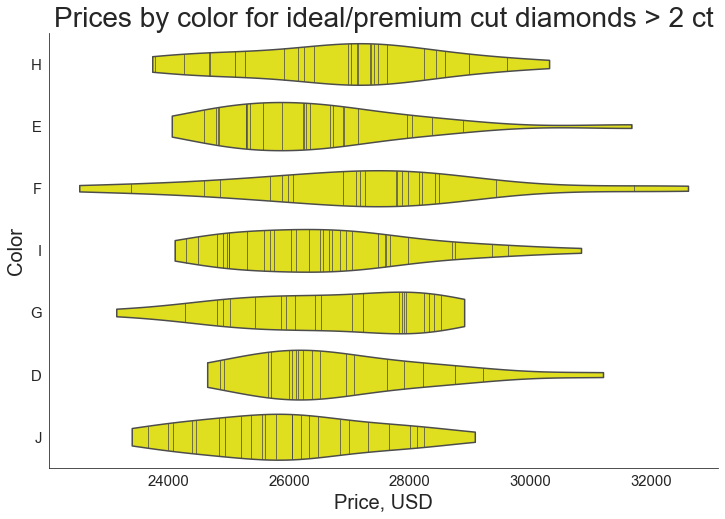

In [7]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='price', y='color', data=df, color='yellow', cut=0,
               inner='stick')
add_cosmetics()

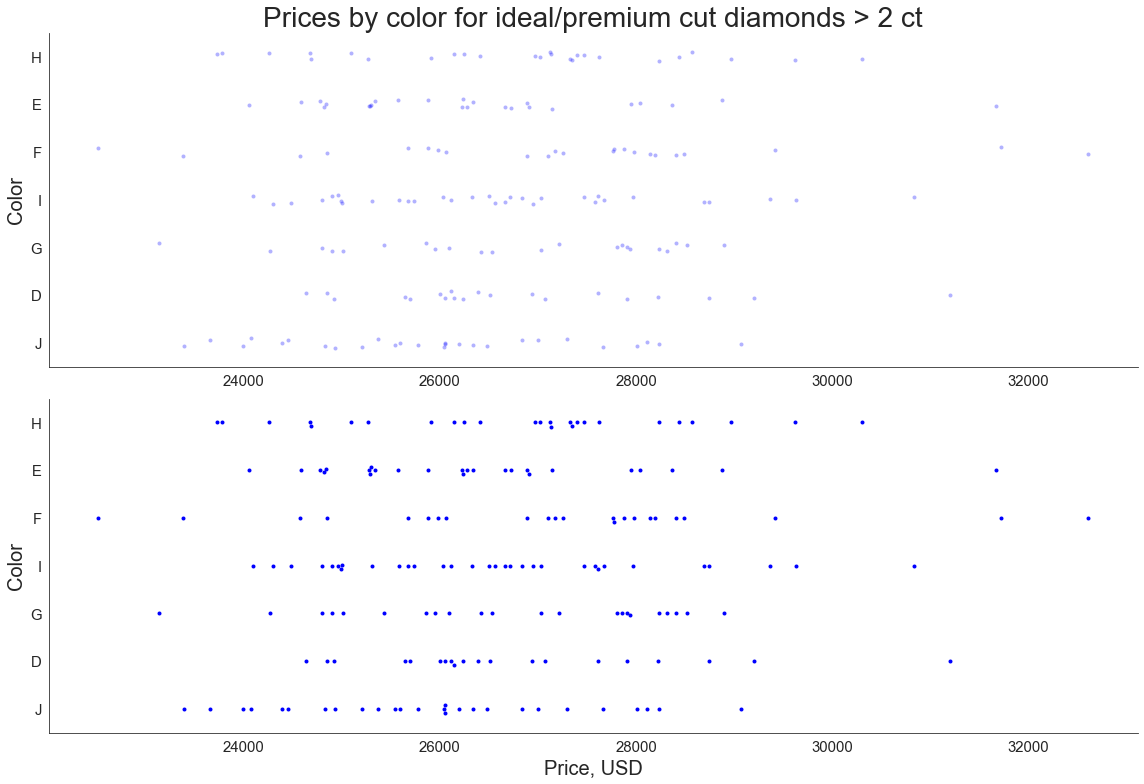

In [8]:
plt.figure(figsize=(16, 11))
plt.subplot(2, 1, 1)
sns.stripplot(x='price', y='color', data=df, color='blue',
              alpha=0.3, size=4)
add_cosmetics(xlabel=None)
plt.subplot(2, 1, 2)
sns.swarmplot(x='price', y='color', data=df, color='blue', size=4)
add_cosmetics(title=None)
plt.tight_layout()

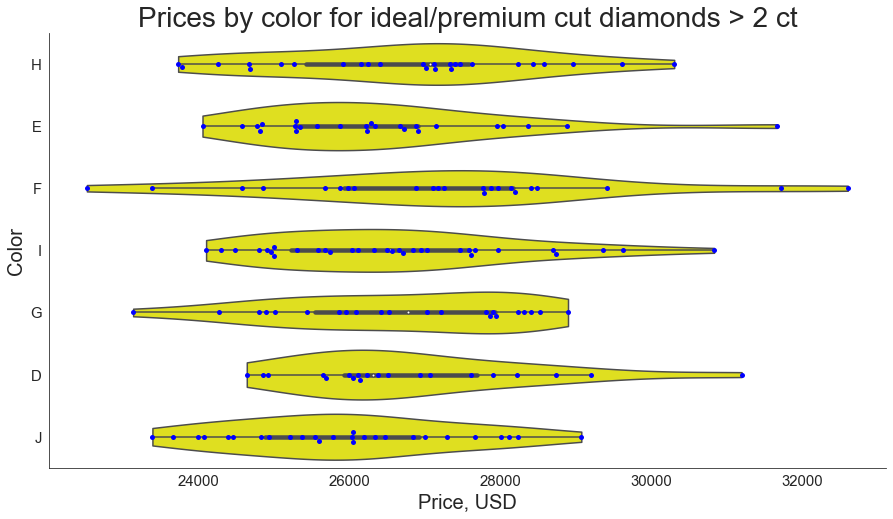

In [9]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='price', y='color', data=df, color='yellow', cut=0)
sns.swarmplot(x='price', y='color', data=df, color='blue')
add_cosmetics()


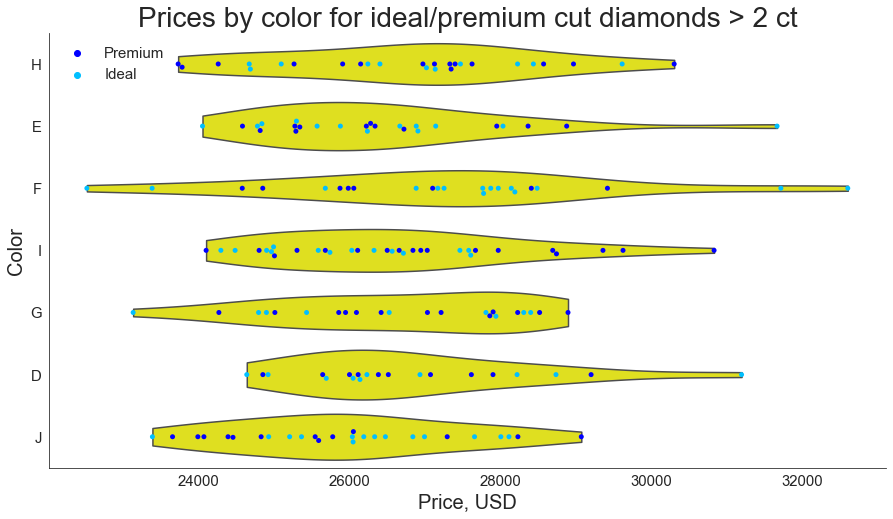

In [10]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='price', y='color', data=df, color='yellow',
               cut=0, inner=None)
sns.swarmplot(x='price', y='color', hue='cut', data=df,
              palette=['blue', 'deepskyblue'])
plt.legend(frameon=False, fontsize=15, loc='upper left')
add_cosmetics()

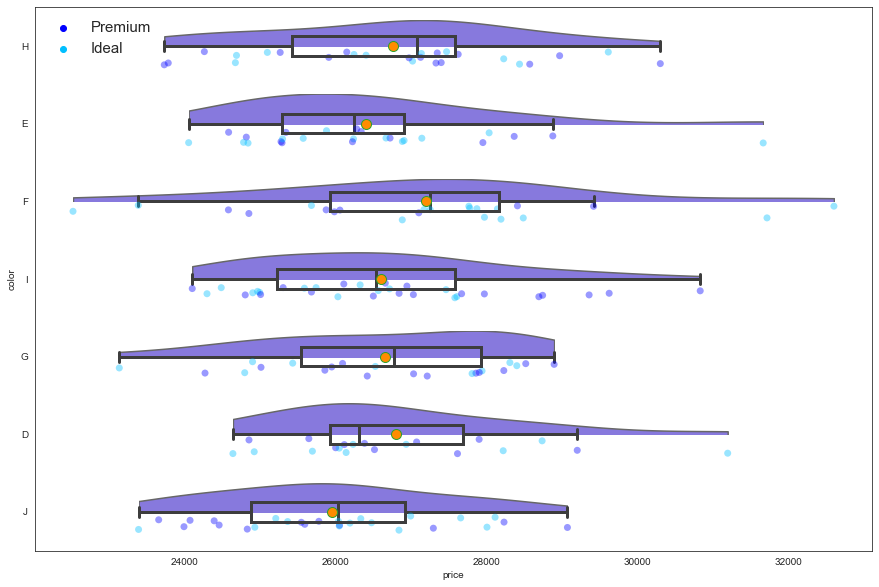

In [11]:
plt.figure(figsize=(15, 10))
# Create violin plots without mini-boxplots inside.
ax = sns.violinplot(x='price', y='color', data=df,
                    color='mediumslateblue', 
                    cut=0, inner=None)

# Clip the lower half of each violin.
for item in ax.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax.transData))
    
# Create strip plots with partially transparent points of different colors depending on the group.
num_items = len(ax.collections)
sns.stripplot(x='price', y='color', hue='cut', data=df, 
              palette=['blue', 'deepskyblue'], alpha=0.4, size=7)
# Shift each strip plot strictly below the correponding volin.
for item in ax.collections[num_items:]:
    item.set_offsets(item.get_offsets() + 0.15)
# Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
sns.boxplot(x='price', y='color', data=df, width=0.25,
            showfliers=False, showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='darkorange',
                           markersize=10, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), 
                          linewidth=3, zorder=3),
            whiskerprops=dict(linewidth=3),
            capprops=dict(linewidth=3),
            medianprops=dict(linewidth=3))
plt.legend(frameon=False, fontsize=15, loc='upper left')


In [12]:
# only two col
new_df = df.copy().loc[:, ['color', 'price']]

<Axes: xlabel='price', ylabel='color'>

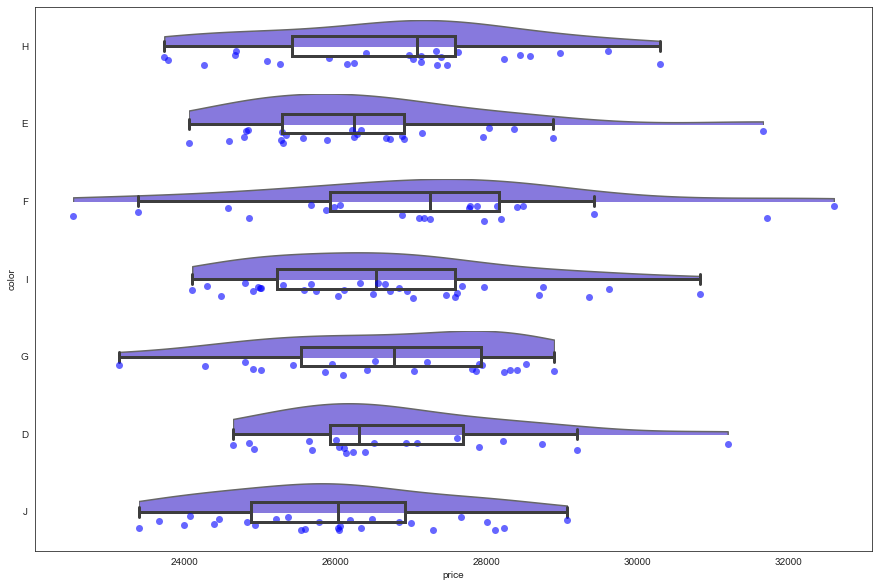

In [13]:
plt.figure(figsize=(15, 10))

# Create violin plots without mini-boxplots inside.
ax = sns.violinplot(x='price', y='color', data=new_df,
                    color='mediumslateblue', 
                    cut=0, inner=None)


# Clip the lower half of each violin.
for item in ax.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax.transData))
    

# Create strip plots with partially transparent points of different colors depending on the group.
num_items = len(ax.collections)
sns.stripplot(x='price', y='color', data=df, color='blue',
              alpha=0.6, size=7)

# Shift each strip plot strictly below the correponding volin.
for item in ax.collections[num_items:]:
    item.set_offsets(item.get_offsets() + 0.15)
    
# Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
sns.boxplot(x='price', y='color', data=df, width=0.25,
            showfliers=False, 
            #showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='darkorange',
                           markersize=10, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), 
                          linewidth=3, zorder=3),
            whiskerprops=dict(linewidth=3),
            capprops=dict(linewidth=3),
            medianprops=dict(linewidth=3))



In [26]:
from collections import defaultdict

import os

def read_df_file(df_file: str):
    
    group_to_data_list = defaultdict(list)
    with open(df_file) as f:
        name_list = f.readline().strip().split('\t')
        print(name_list)
        for line in f:
            value_list = line.strip().split('\t')
            print(value_list)
            input()
            for idx, value in enumerate(value_list):
                name = name_list[idx]
                
                if value and value.isdigit():
                    group_to_data_list[name].append(int(value))
    print(f'group: {name_list}')
    
    

    data_df = pd.DataFrame([(key, val) for key, vals in group_to_data_list.items() for val in vals], 
                  columns=['group', 'number'])
    
    return data_df

In [60]:
def read_tsv_file(file_path):
    data_dict = defaultdict(list)
    
    
    with open(file_path, 'r') as tsv_file:
        reader = csv.reader(tsv_file, delimiter='\t')

        # 读取抬头行，获取列名
        header = next(reader)
        num_columns = len(header)


        # 逐行读取数据并将其添加到对应的列列表中
        for row in reader:
            #print(row)
            #input()
            for i in range(num_columns):
                if str(row[i]).isdigit():
                    data_dict[header[i]].append(int(row[i]))
    
    data_df = pd.DataFrame([(key, val) for key, vals in data_dict.items() for val in vals], 
              columns=['group', 'number'])
    return data_df, header
            

Processing: homo-nohomoARG.txt
group: ['Homo', 'Non homo', 'Chicken', 'Swine', 'Cow', 'Dog', 'Cat', 'Blowfly', 'Enviroment']


/var/folders/pt/twmnkb5x0m9by2q7fjhs3c5r0000gn/T/ipykernel_88252/2954765373.py:42: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='number', y='group', data=plot_df,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/homo-nohomoARG.eps saved.


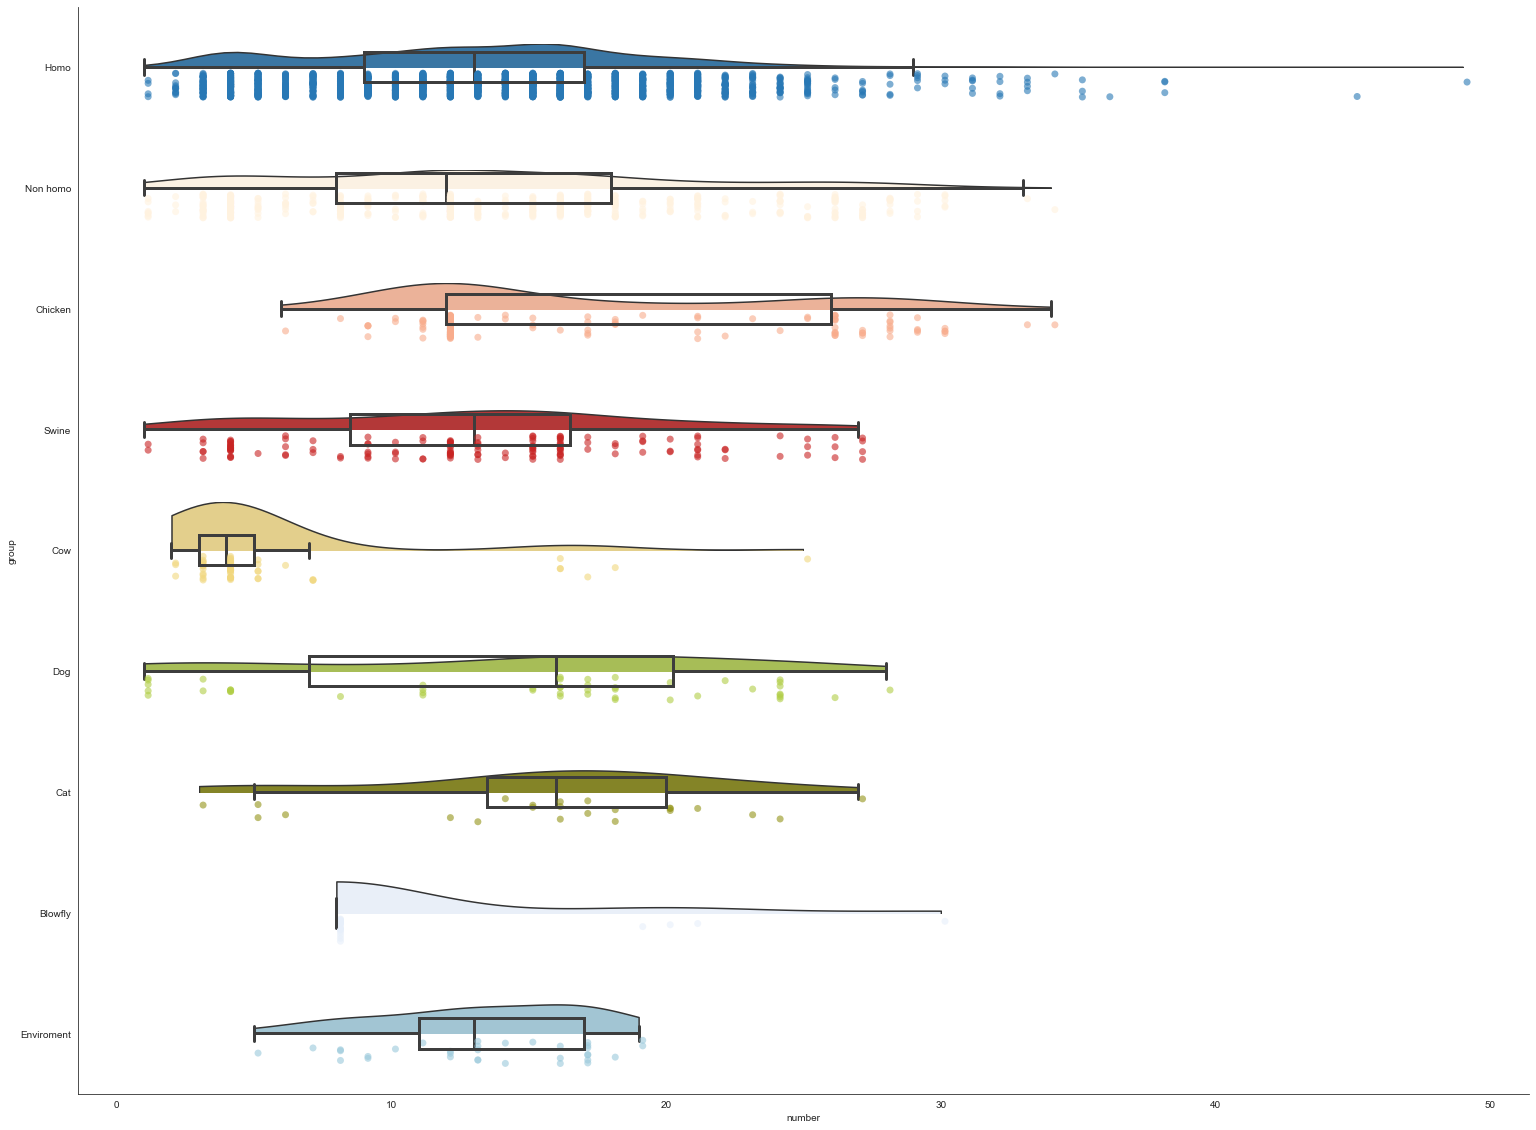

In [17]:
# read data
test_file = f'{base_dir}/homo-nohomoARG.txt'
save_file = f'{base_dir}/homo-nohomoARG.eps'

print(f'Processing: {os.path.basename(test_file)}')
plot_df = read_df_file(test_file)


# color setting

colors = {'Homo': '#2878B5',
          'Non homo': '#fff2df',
          'Chicken': '#F8AC8C',
          'Swine': '#C82423',
          'Cow': '#F1D77E',
          'Dog': '#B1CE46',
          'Cat': '#939417',
          'Blowfly': '#E7EFFA',
          'Enviroment': '#9AC9DB'}
#color_palette = [colors[key] for key in plot_df['group'].values]



# start to plot
plt.figure(figsize=(26, 20))

# Create violin plots without mini-boxplots inside.
ax = sns.violinplot(x='number', y='group', data=plot_df,
                    palette=colors,
                    cut=0, inner=None)


# Clip the lower half of each violin.
for item in ax.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax.transData))
    

# Create strip plots with partially transparent points of different colors depending on the group.
num_items = len(ax.collections)
sns.stripplot(x='number', y='group', data=plot_df,
              palette=colors,
              alpha=0.6, size=7)

# Shift each strip plot strictly below the correponding volin.
for item in ax.collections[num_items:]:
    item.set_offsets(item.get_offsets() + 0.15)
    
# Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
sns.boxplot(x='number', y='group', data=plot_df, width=0.25,
            showfliers=False, 
            #showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='darkorange',
                           markersize=10, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), 
                          linewidth=3, zorder=3),
            whiskerprops=dict(linewidth=3),
            capprops=dict(linewidth=3),
            medianprops=dict(linewidth=3))

# Hide the top and right spines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the remaining spines (bottom and left).
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.savefig(save_file, dpi=630, bbox_inches='tight')
print(f'{save_file} saved.')


Processing: 时间段VF.txt


/var/folders/pt/twmnkb5x0m9by2q7fjhs3c5r0000gn/T/ipykernel_88252/2366167629.py:48: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='number', y='group', data=plot_df,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/时间段VF.eps saved.
Processing: 时间段Plasmid.txt


/var/folders/pt/twmnkb5x0m9by2q7fjhs3c5r0000gn/T/ipykernel_88252/2366167629.py:48: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='number', y='group', data=plot_df,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/var/folders/pt/twmnkb5x0m9by2q7fjhs3c5r0000gn/T/ipykernel_88252/2366167629.py:48: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='number', y='group', data=plot_df,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/时间段Plasmid.eps saved.
Processing: Europ host ARGs.txt
/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/Europ host ARGs.eps saved.
Processing: Europ 时间段ARG.txt


/var/folders/pt/twmnkb5x0m9by2q7fjhs3c5r0000gn/T/ipykernel_88252/2366167629.py:48: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='number', y='group', data=plot_df,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/Europ 时间段ARG.eps saved.
Processing: china总ARG.txt


/var/folders/pt/twmnkb5x0m9by2q7fjhs3c5r0000gn/T/ipykernel_88252/2366167629.py:48: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='number', y='group', data=plot_df,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/var/folders/pt/twmnkb5x0m9by2q7fjhs3c5r0000gn/T/ipykernel_88252/2366167629.py:48: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='number', y='group', data=plot_df,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/china总ARG.eps saved.
Processing: 时间段ARG.txt
/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/时间段ARG.eps saved.
Processing: USA时间段总ARG.txt


/var/folders/pt/twmnkb5x0m9by2q7fjhs3c5r0000gn/T/ipykernel_88252/2366167629.py:48: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='number', y='group', data=plot_df,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/USA时间段总ARG.eps saved.
Processing: homo-nohomoARG.txt


/var/folders/pt/twmnkb5x0m9by2q7fjhs3c5r0000gn/T/ipykernel_88252/2366167629.py:48: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='number', y='group', data=plot_df,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/homo-nohomoARG.eps saved.
Processing: china host ARGs.txt


/var/folders/pt/twmnkb5x0m9by2q7fjhs3c5r0000gn/T/ipykernel_88252/2366167629.py:48: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='number', y='group', data=plot_df,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/china host ARGs.eps saved.
Processing: USA host ARGs.txt


/var/folders/pt/twmnkb5x0m9by2q7fjhs3c5r0000gn/T/ipykernel_88252/2366167629.py:48: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='number', y='group', data=plot_df,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/USA host ARGs.eps saved.


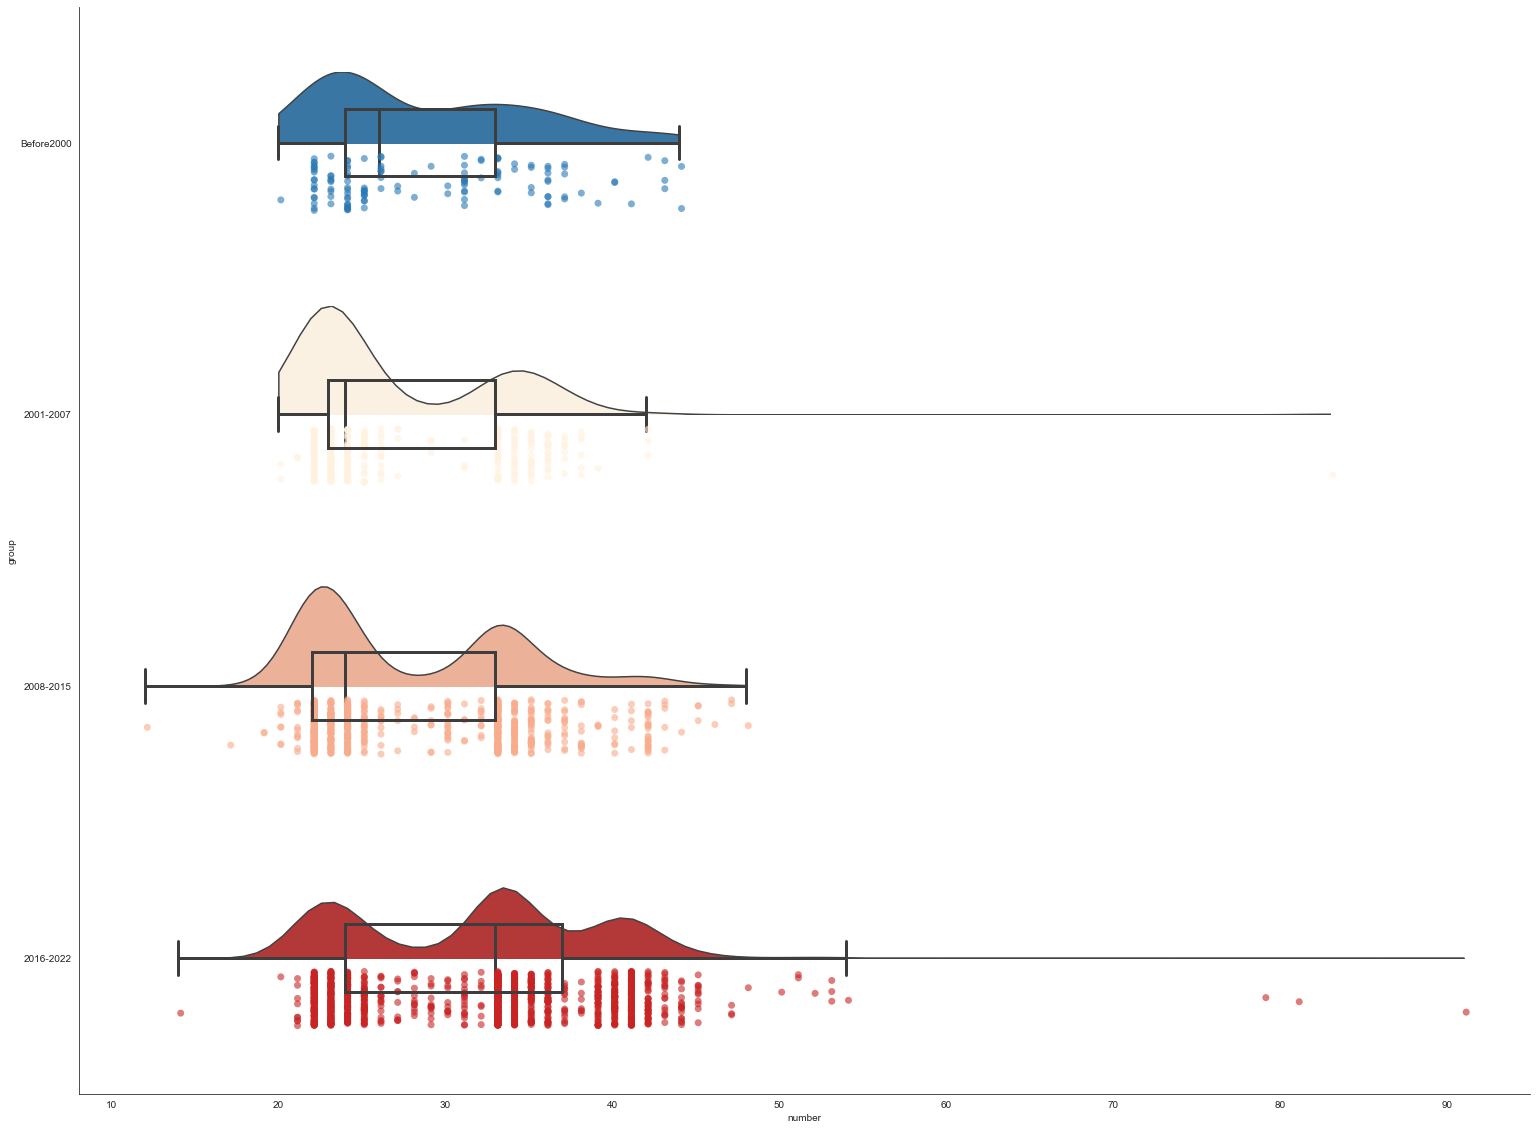

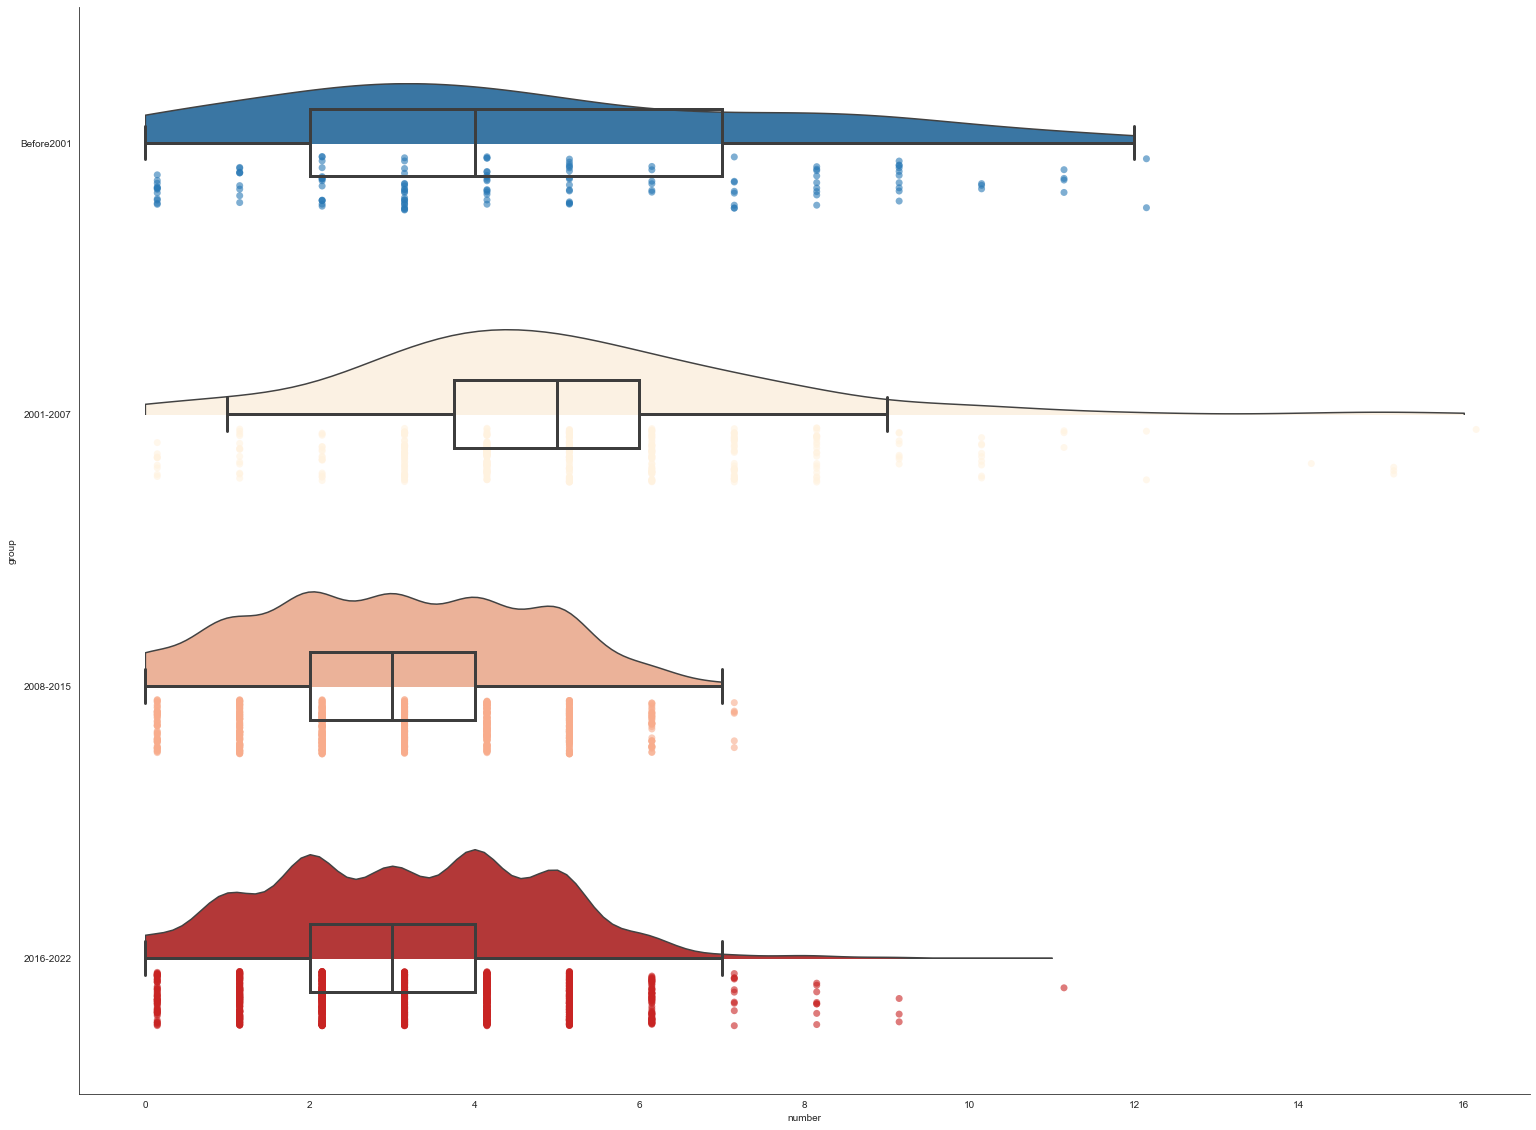

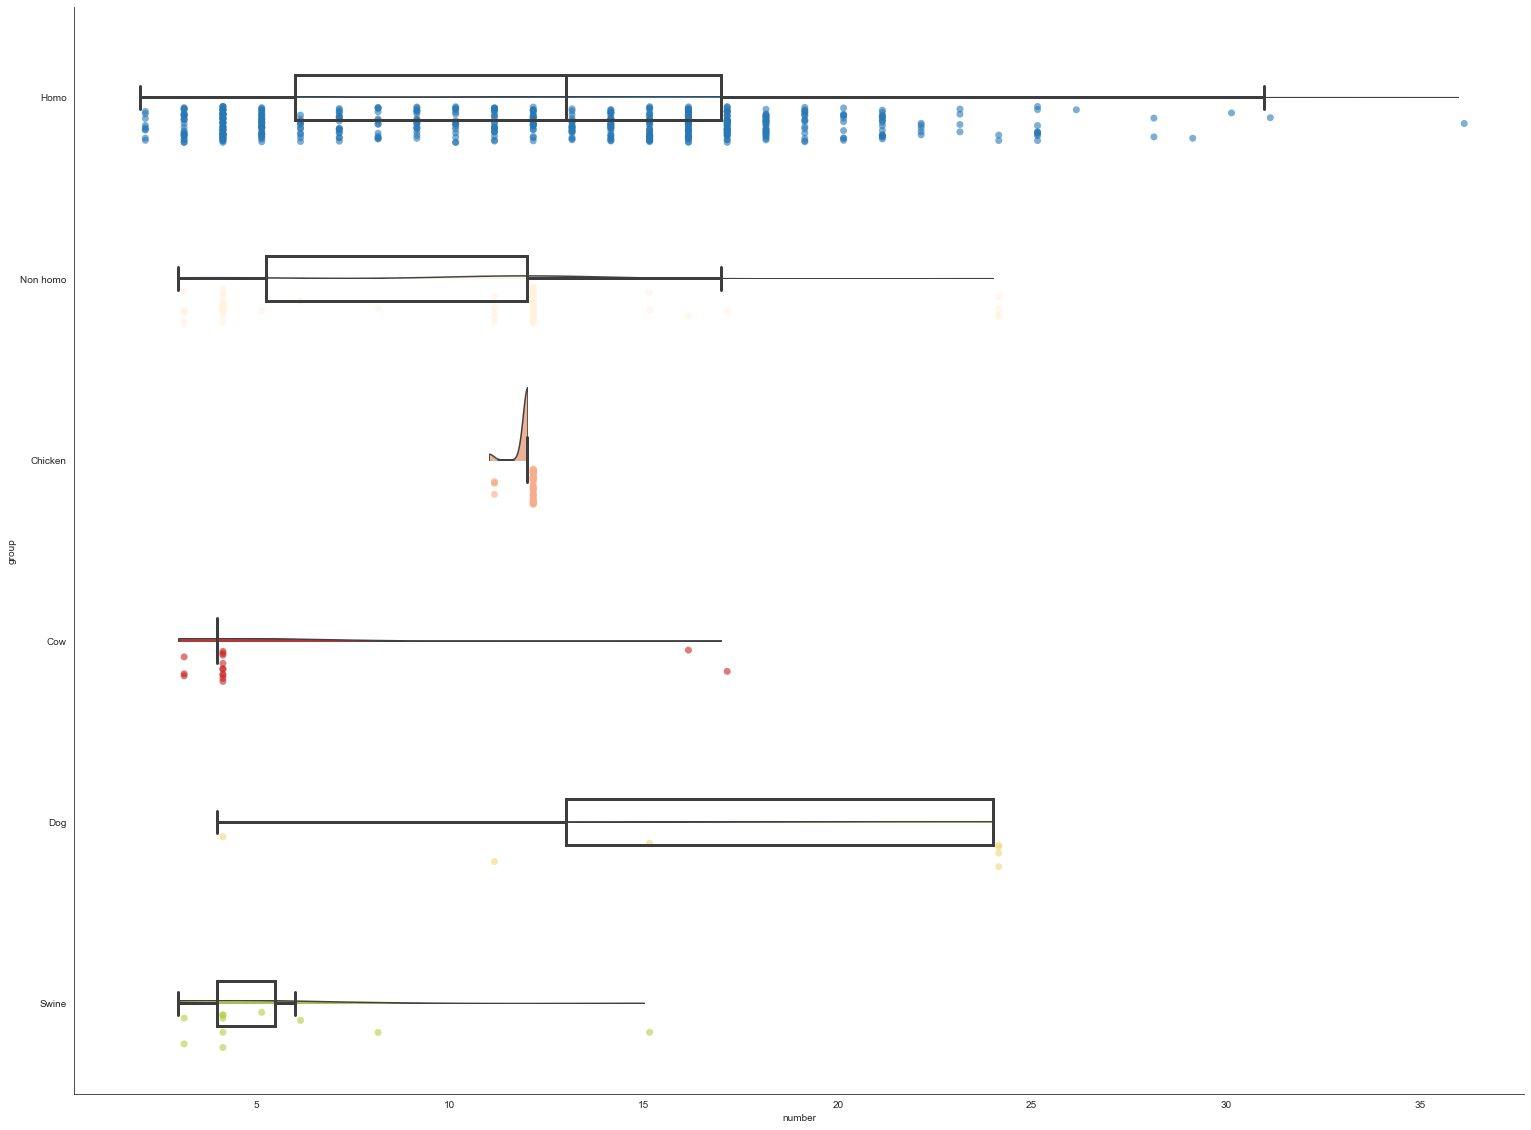

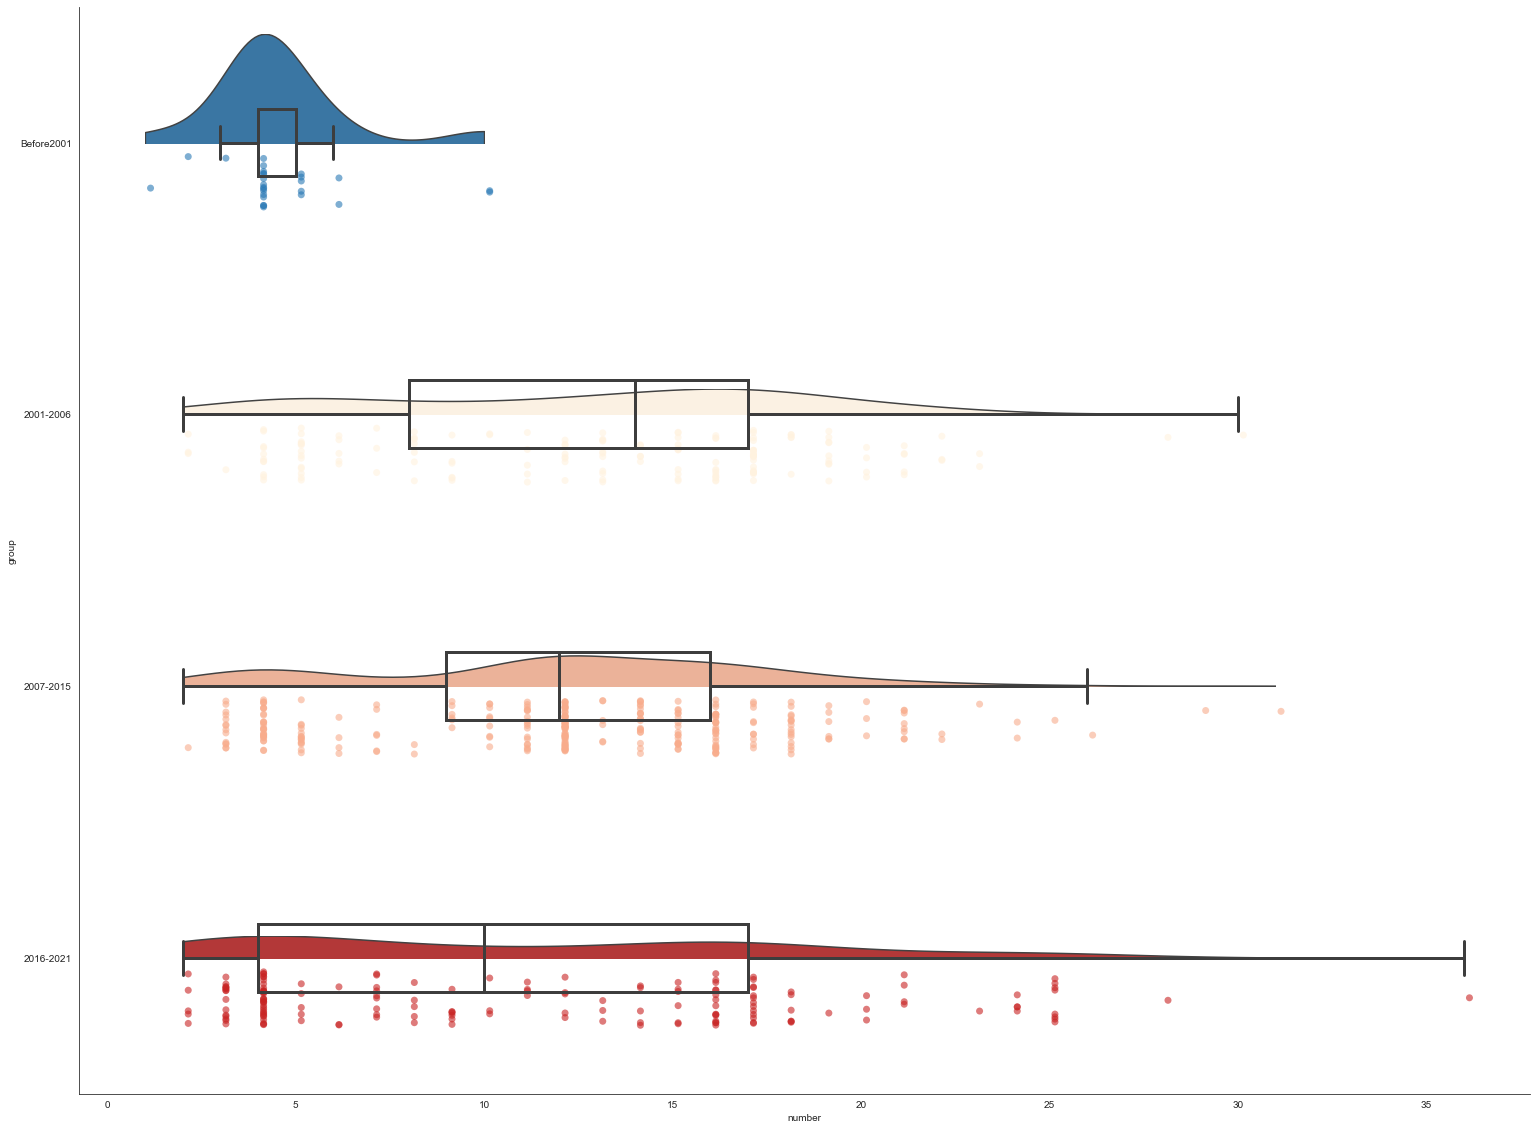

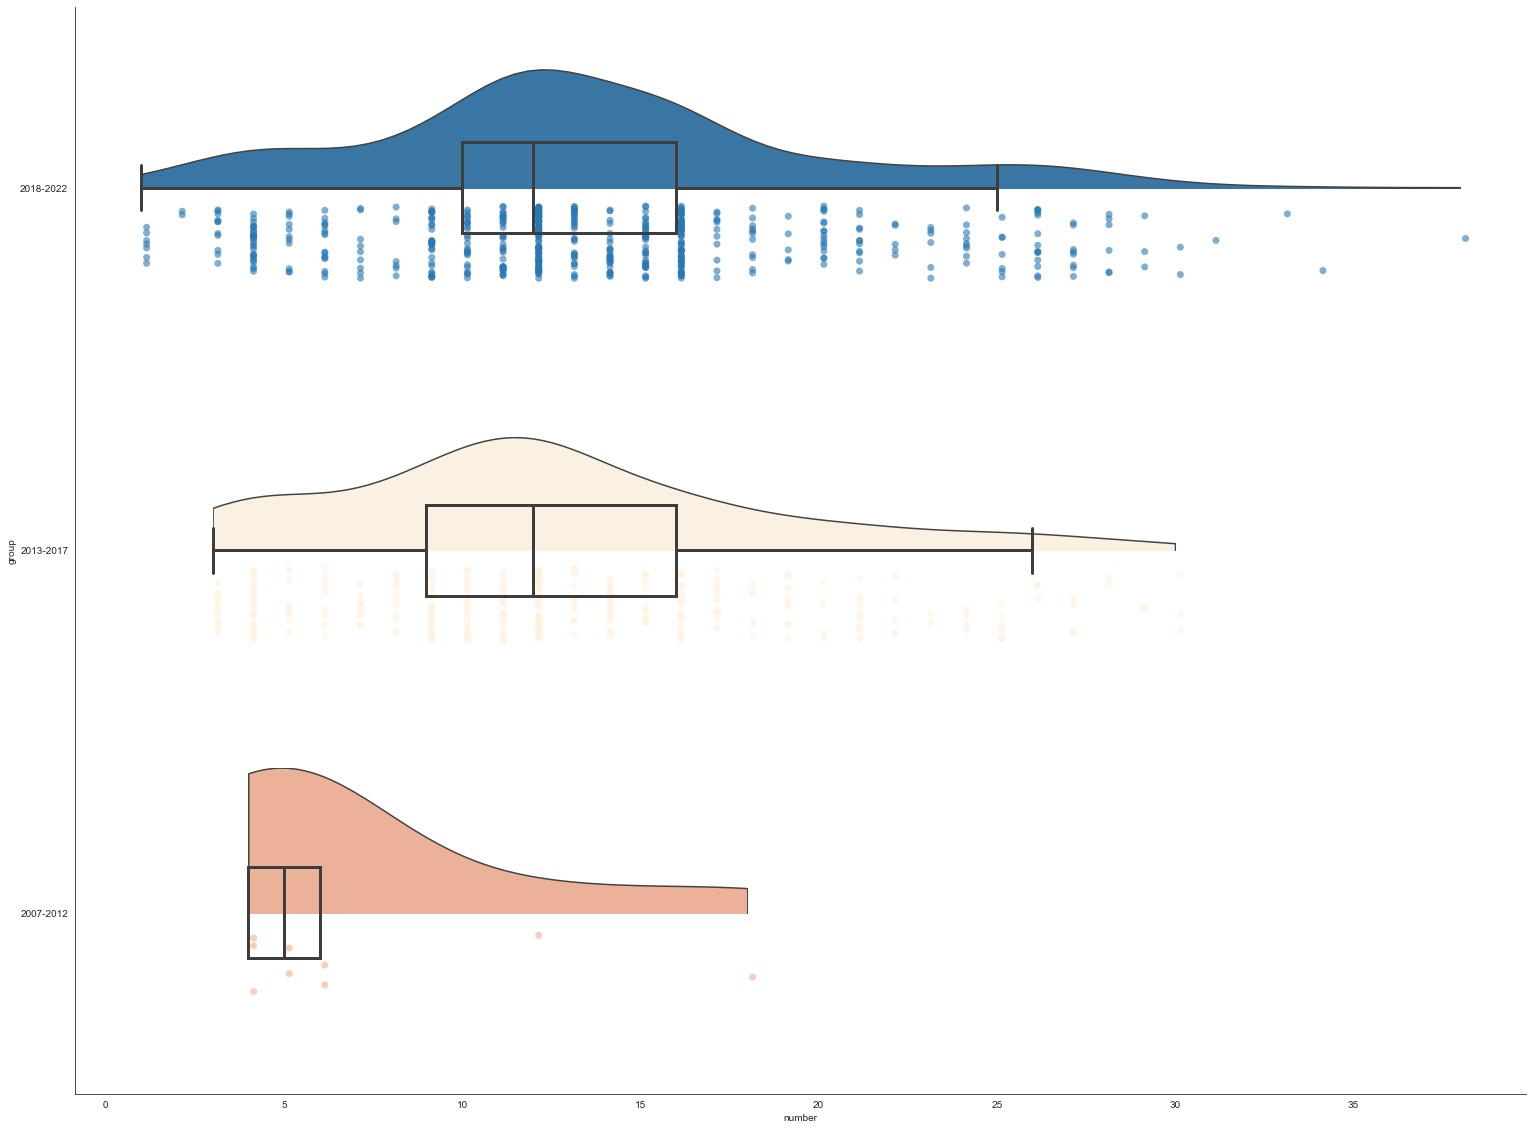

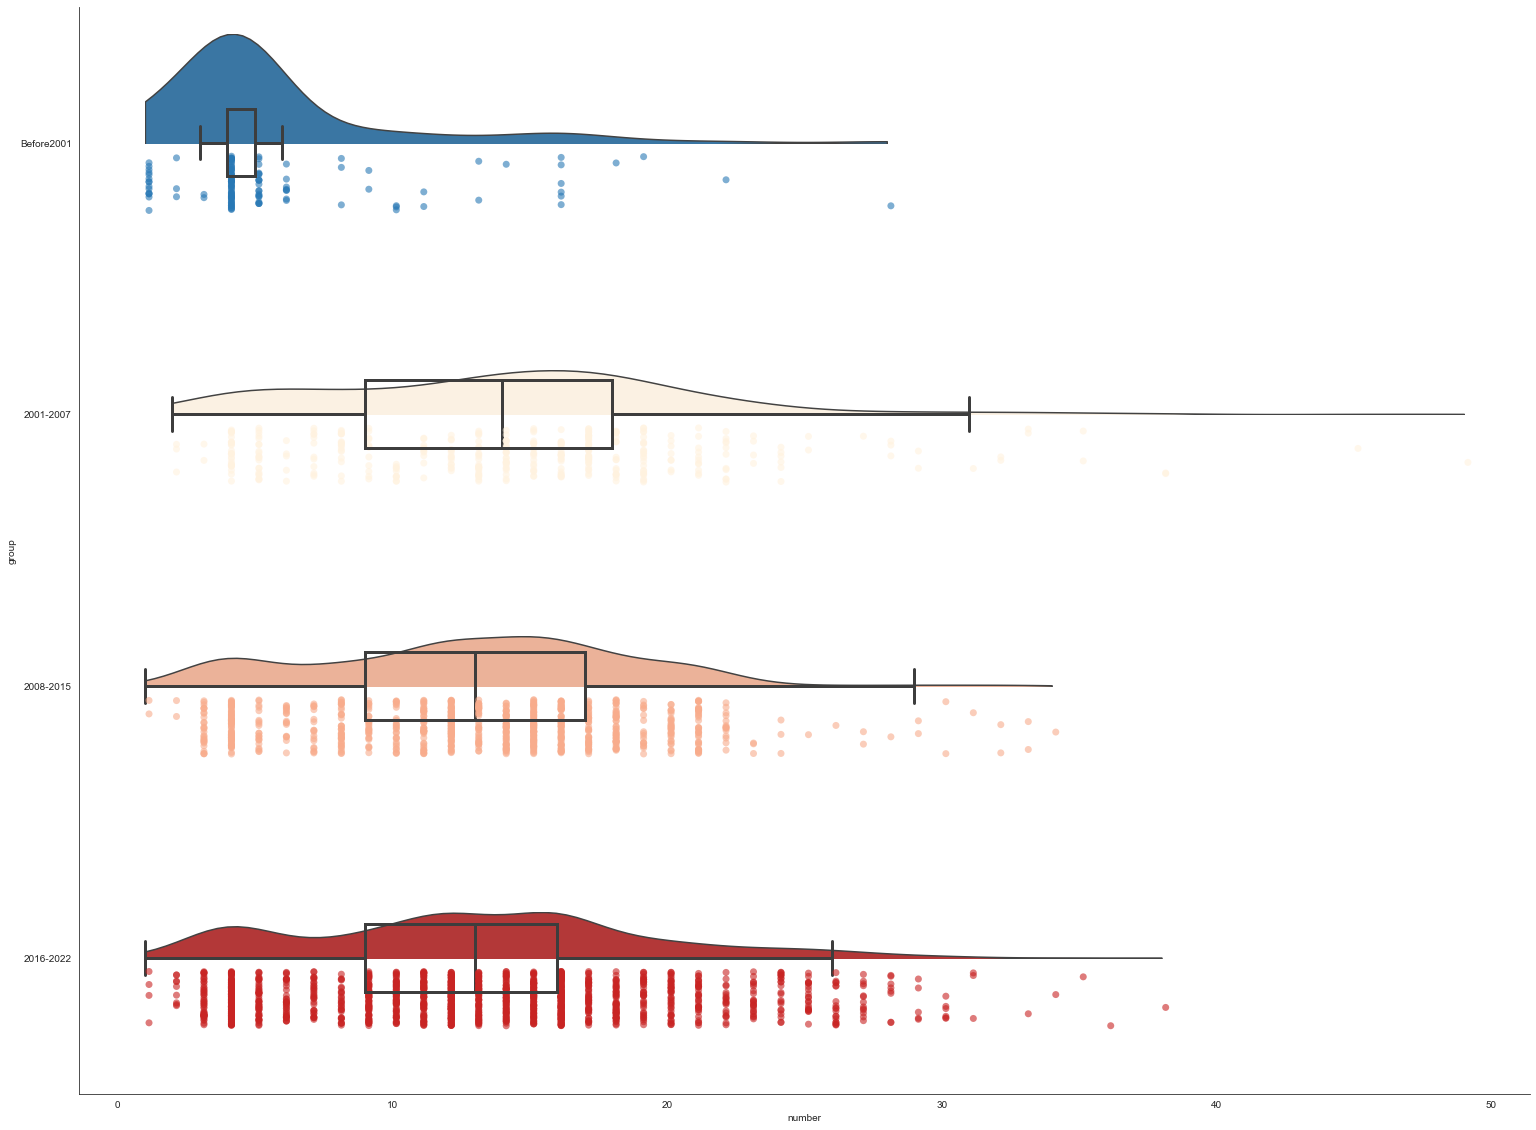

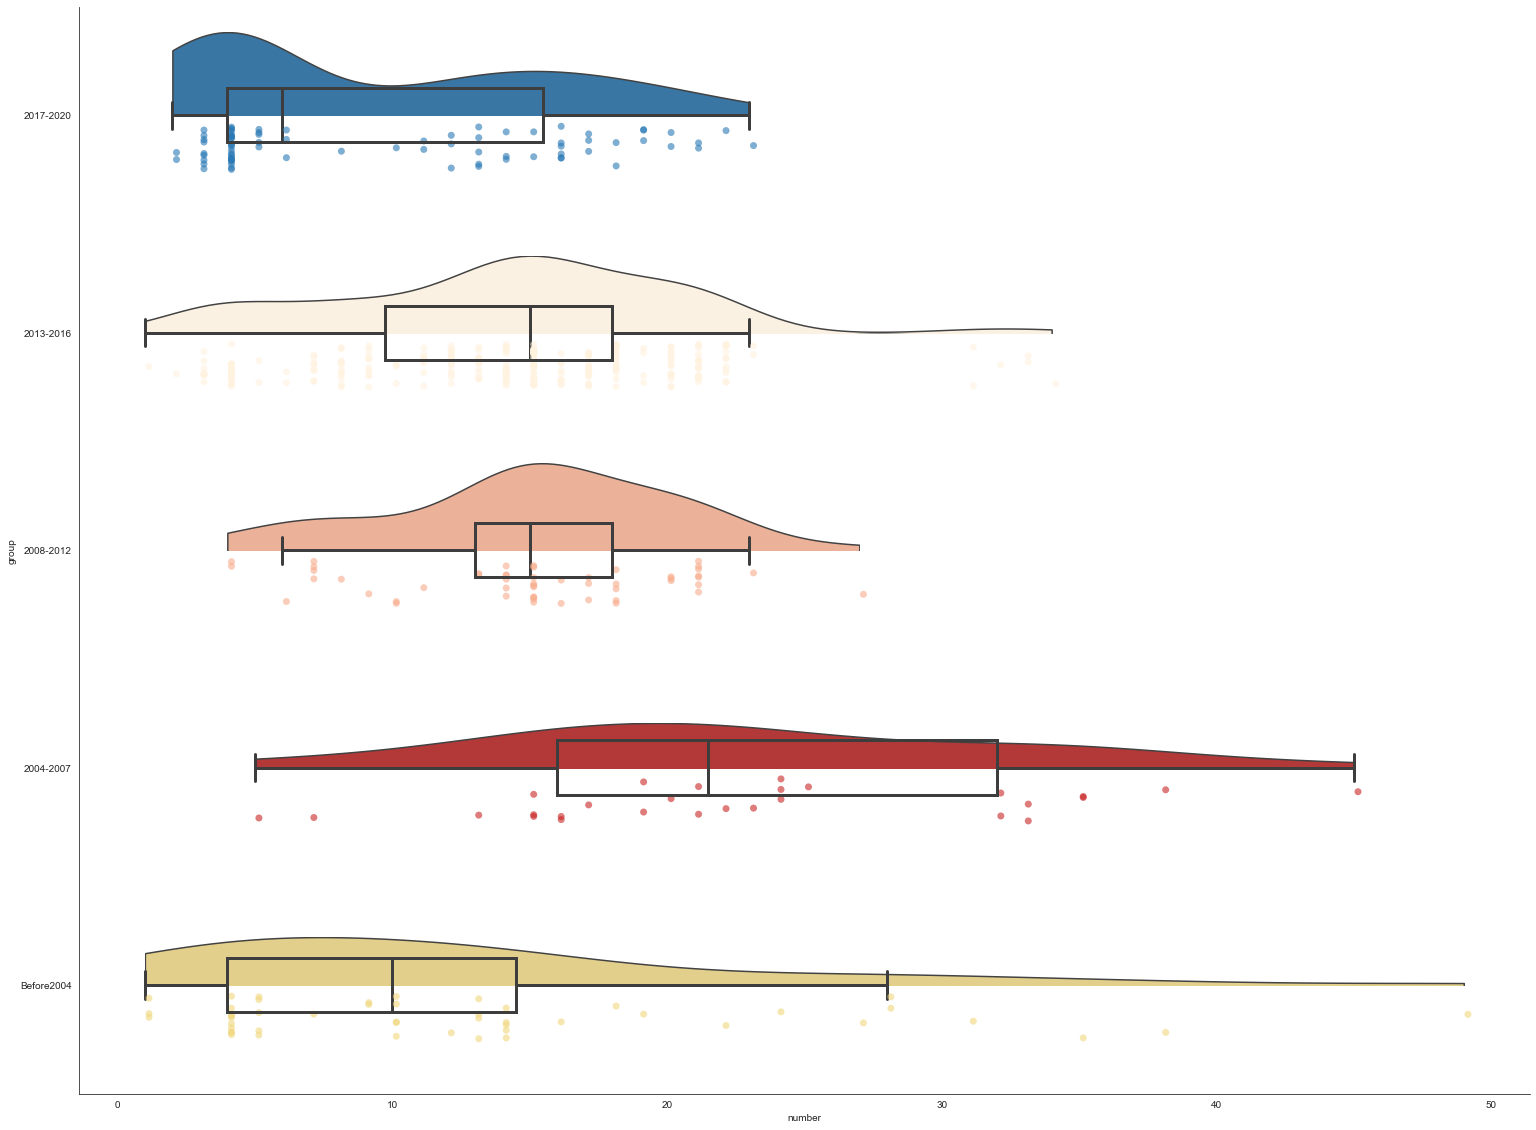

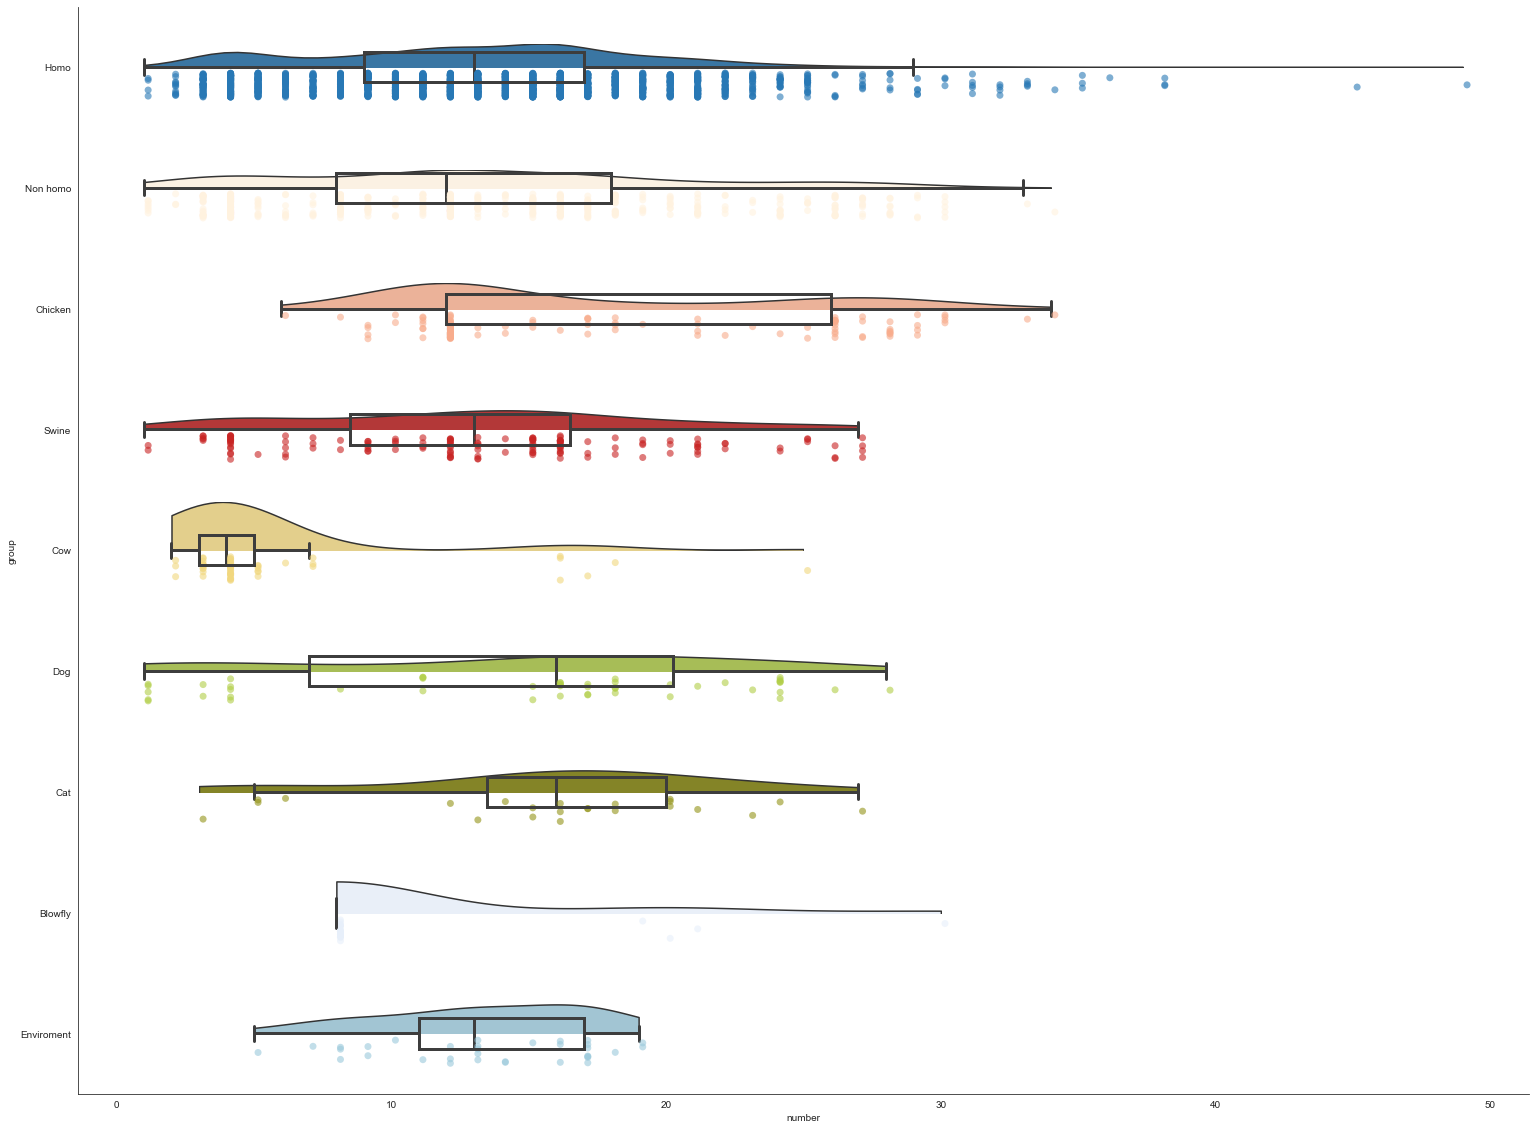

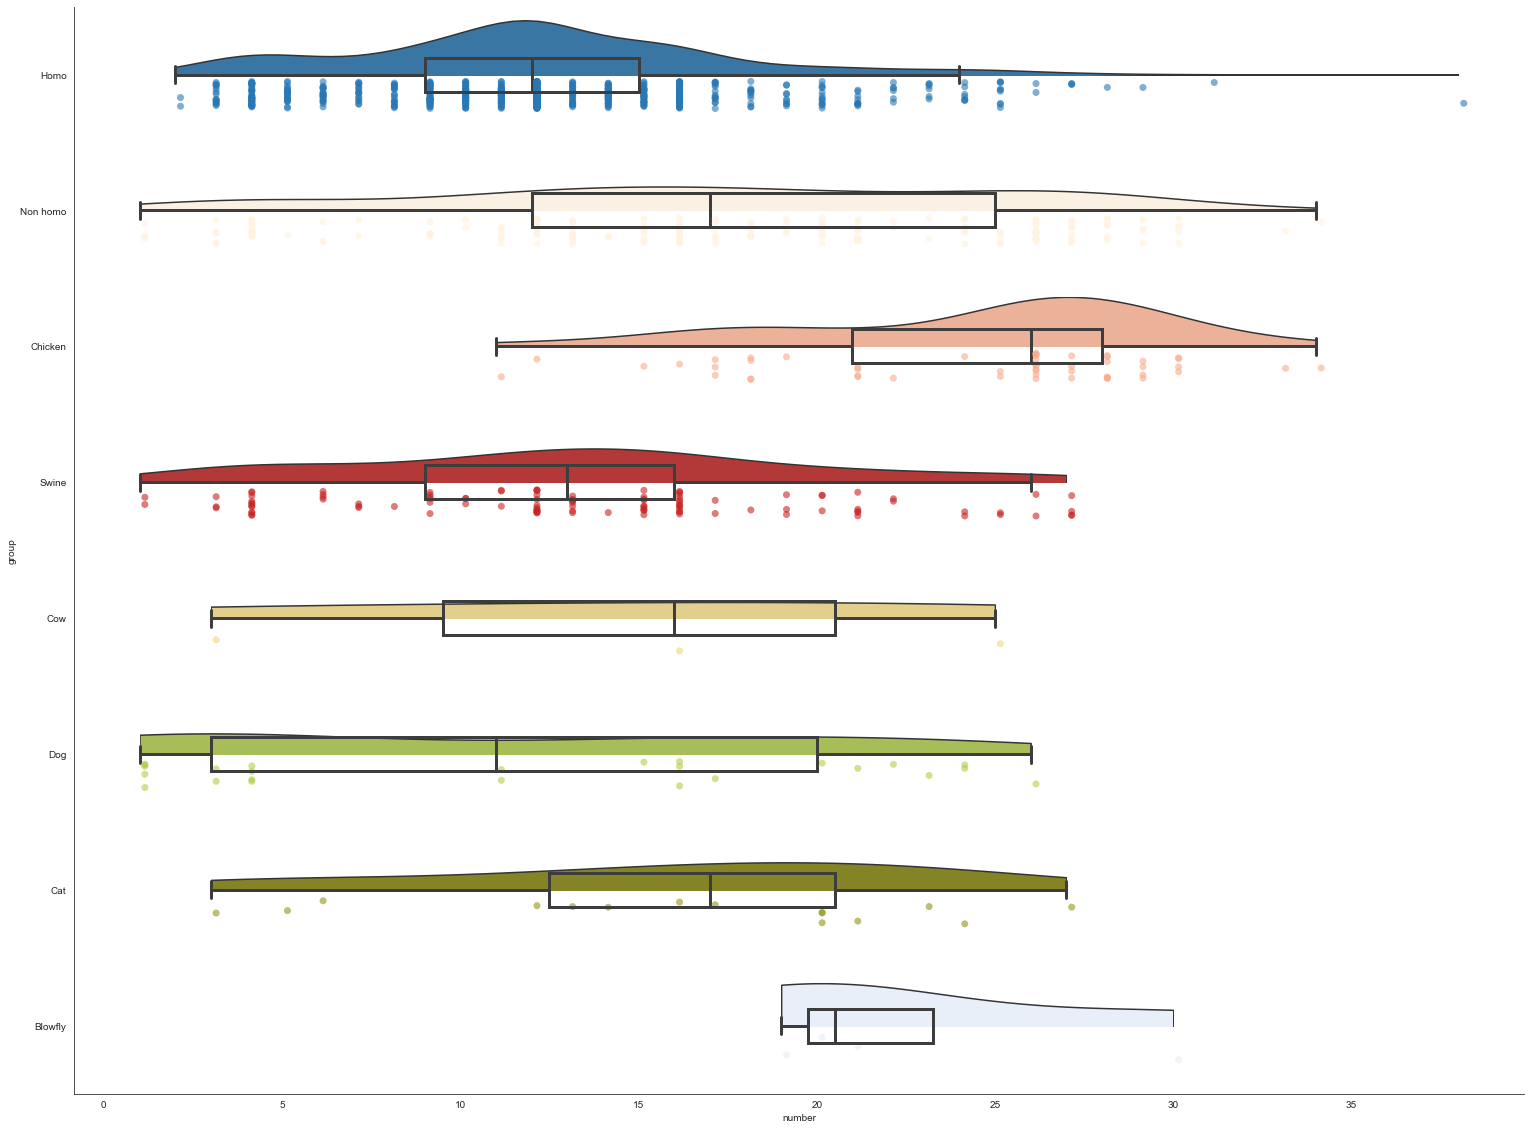

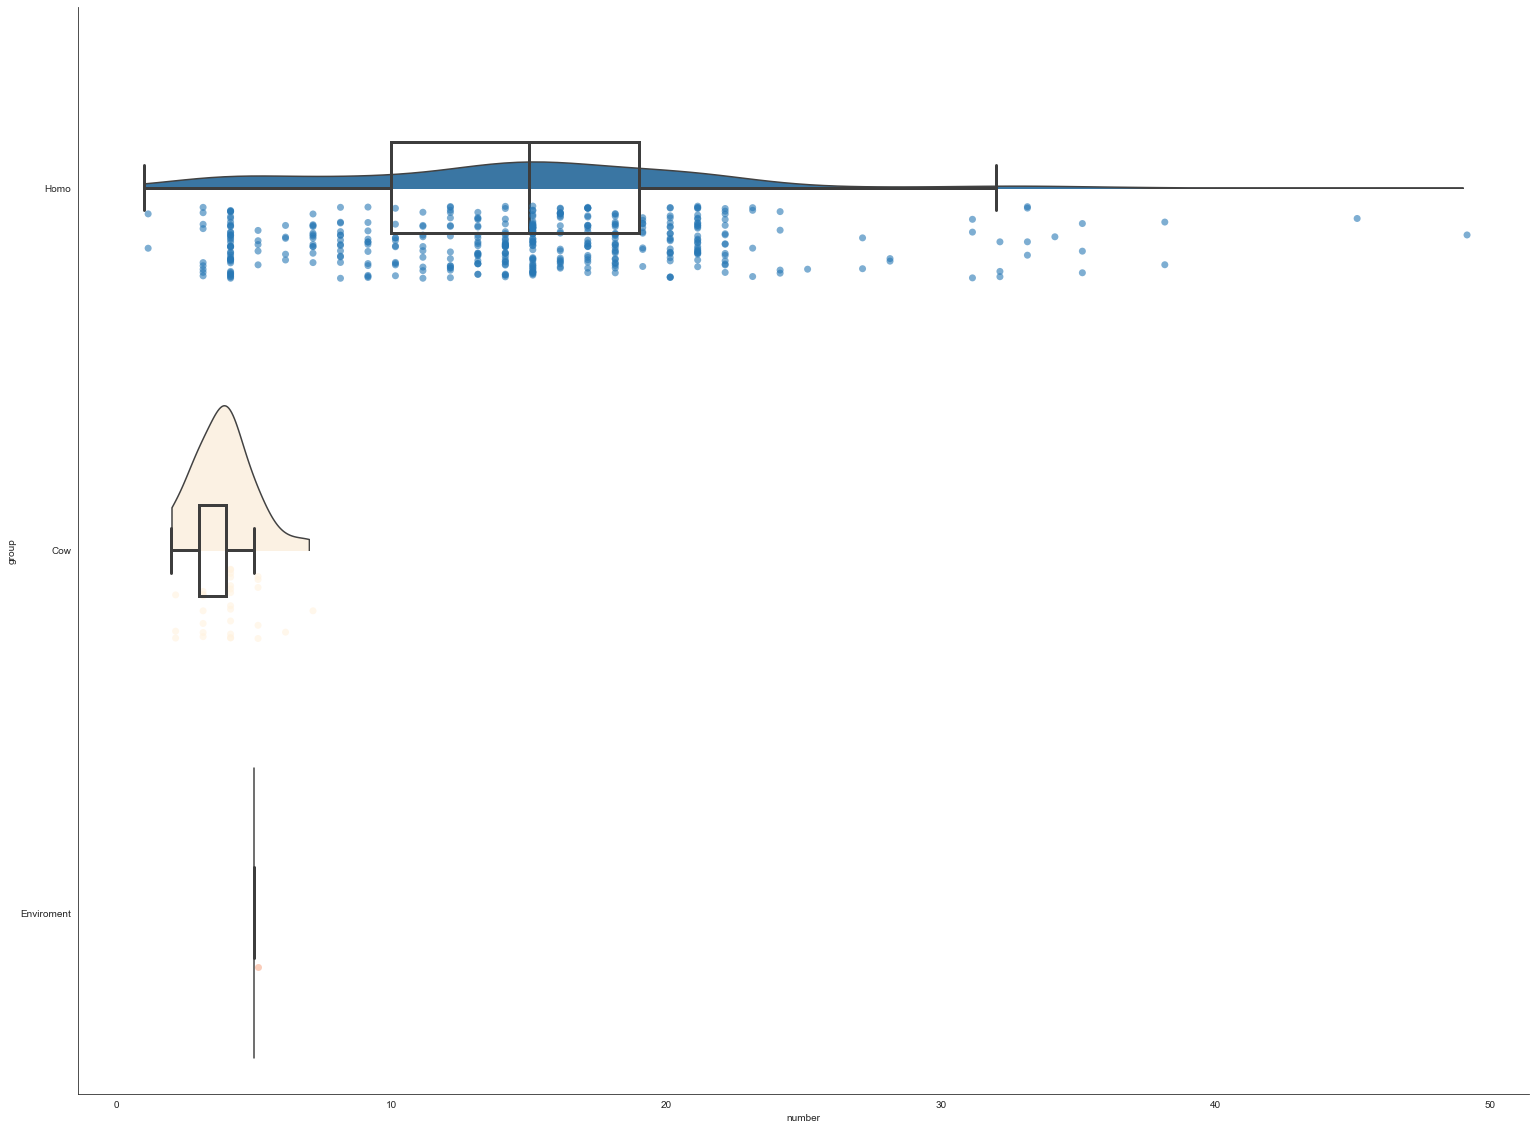

In [69]:
# 全部图循环画
colors_list = ['#2878B5',
          '#fff2df',
          '#F8AC8C',
          '#C82423',
         '#F1D77E',
          '#B1CE46',
          '#939417',
          '#E7EFFA',
          '#9AC9DB']

# eps png
save_format = 'eps'


for file in file_list:
    prefix = file.split('.')[0]

    # read data
    test_file = f'{base_dir}/{prefix}.txt'
    save_file = f'{base_dir}/{prefix}.{save_format}'

    print(f'Processing: {os.path.basename(test_file)}')
    #plot_df = read_df_file(test_file)
    
    plot_df, header = read_tsv_file(test_file)
    
    colors = {head: colors_list[idx] for idx, head in enumerate(header)}
    
    # start to plot
    plt.figure(figsize=(26, 20))

    # Create violin plots without mini-boxplots inside.
    ax = sns.violinplot(x='number', y='group', data=plot_df,
                        palette=colors,
                        cut=0, inner=None)


    # Clip the lower half of each violin.
    for item in ax.collections:
        x0, y0, width, height = item.get_paths()[0].get_extents().bounds
        item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                           transform=ax.transData))


    # Create strip plots with partially transparent points of different colors depending on the group.
    num_items = len(ax.collections)
    sns.stripplot(x='number', y='group', data=plot_df,
                  palette=colors,
                  alpha=0.6, size=7)

    # Shift each strip plot strictly below the correponding volin.
    for item in ax.collections[num_items:]:
        item.set_offsets(item.get_offsets() + 0.15)
    
    # Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
    sns.boxplot(x='number', y='group', data=plot_df, width=0.25,
                showfliers=False, 
                meanprops=dict(marker='o', markerfacecolor='darkorange',
                               markersize=10, zorder=3),
                boxprops=dict(facecolor=(0,0,0,0), 
                              linewidth=3, zorder=3),
                whiskerprops=dict(linewidth=3),
                capprops=dict(linewidth=3),
                medianprops=dict(linewidth=3))

    # Hide the top and right spines.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the remaining spines (bottom and left).
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    plt.savefig(save_file, dpi=630, bbox_inches='tight')
    print(f'{save_file} saved.')

Processing: 时间段ARG.txt


/var/folders/pt/twmnkb5x0m9by2q7fjhs3c5r0000gn/T/ipykernel_88252/4079835210.py:37: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='number', y='group', data=plot_df,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/时间段ARG.eps saved.


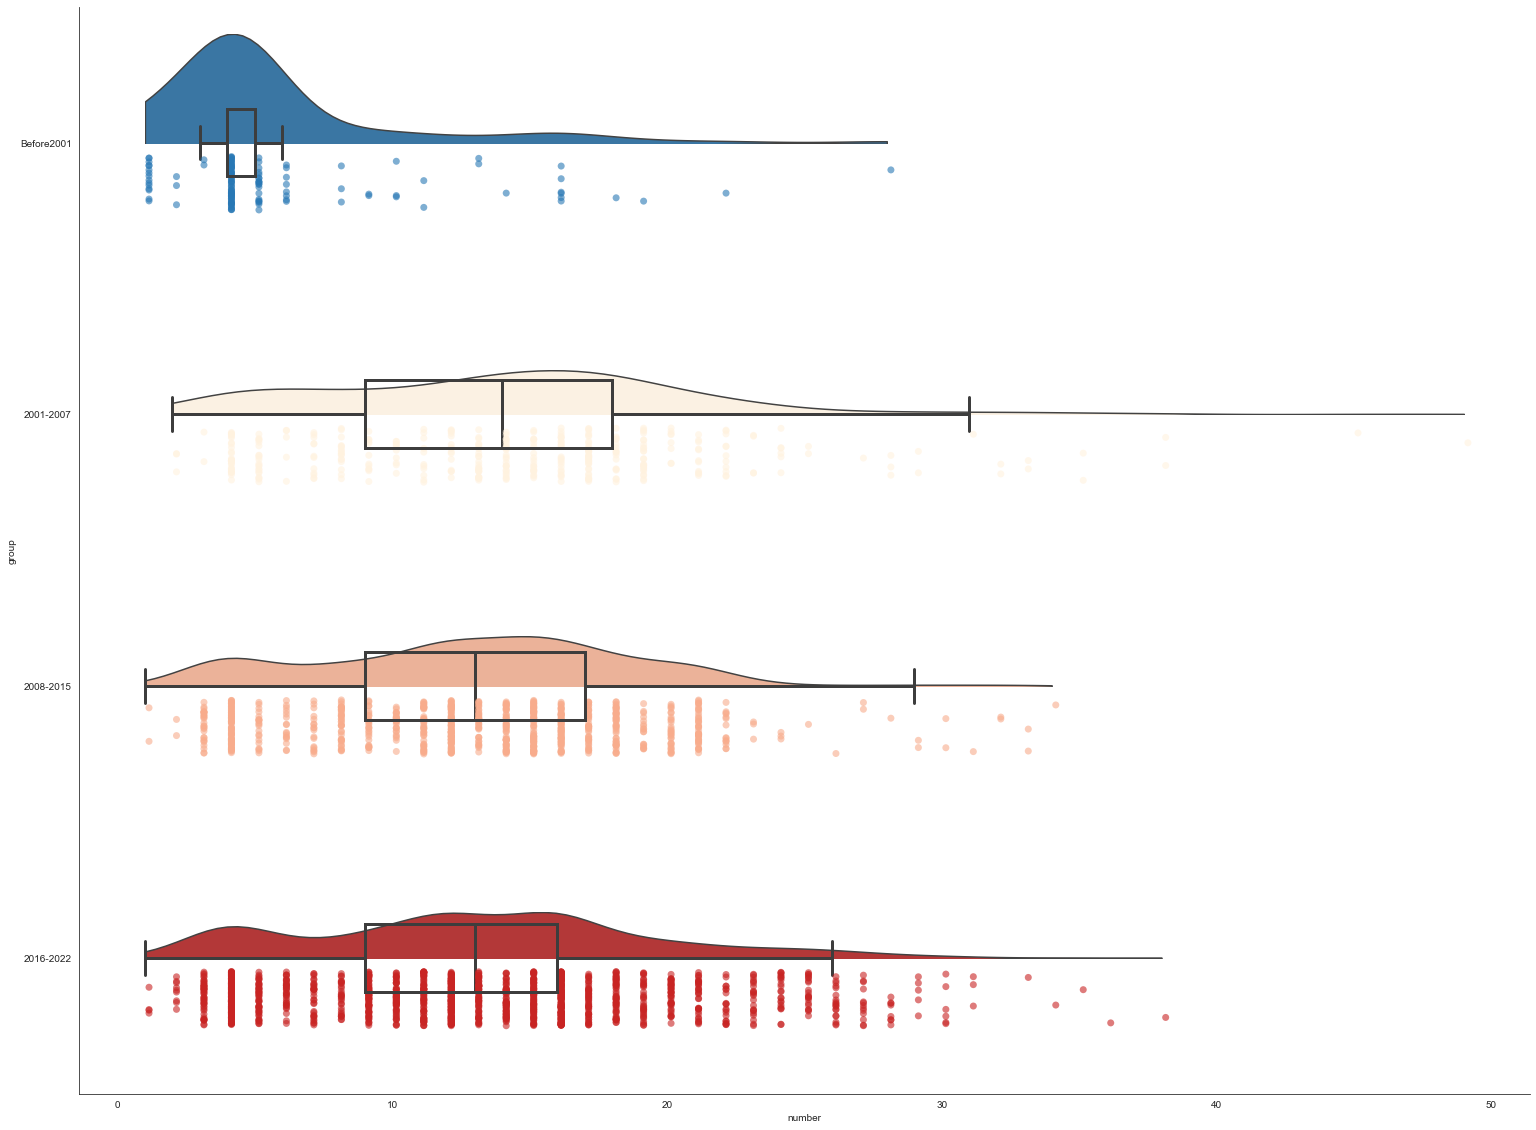

In [55]:
# read data
test_file = f'{base_dir}/时间段ARG.txt'
save_file = f'{base_dir}/时间段ARG.eps'

print(f'Processing: {os.path.basename(test_file)}')
plot_df = read_tsv_file(test_file)


# color setting
colors_list = ['#2878B5',
          '#fff2df',
          '#F8AC8C',
          '#C82423',
         '#F1D77E',
          '#B1CE46',
          '#939417',
          '#E7EFFA',
          '#9AC9DB']

#color_palette = [colors[key] for key in plot_df['group'].values]



# start to plot
plt.figure(figsize=(26, 20))

# Create violin plots without mini-boxplots inside.
ax = sns.violinplot(x='number', y='group', data=plot_df,
                    palette=colors,
                    cut=0, inner=None)


# Clip the lower half of each violin.
for item in ax.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax.transData))
    

# Create strip plots with partially transparent points of different colors depending on the group.
num_items = len(ax.collections)
sns.stripplot(x='number', y='group', data=plot_df,
              palette=colors,
              alpha=0.6, size=7)

# Shift each strip plot strictly below the correponding volin.
for item in ax.collections[num_items:]:
    item.set_offsets(item.get_offsets() + 0.15)
    
# Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
sns.boxplot(x='number', y='group', data=plot_df, width=0.25,
            showfliers=False, 
            #showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='darkorange',
                           markersize=10, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), 
                          linewidth=3, zorder=3),
            whiskerprops=dict(linewidth=3),
            capprops=dict(linewidth=3),
            medianprops=dict(linewidth=3))

# Hide the top and right spines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the remaining spines (bottom and left).
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.savefig(save_file, dpi=630, bbox_inches='tight')
print(f'{save_file} saved.')


Processing: 时间段ARG.txt
{'Before2001': '#2878B5', '2001-2007': '#fff2df', '2008-2015': '#F8AC8C', '2016-2022': '#C82423'}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/Users/yao/Nutstore Files/Mac2PC/Huang-Bacteria/KP_result/小提琴-散点-箱型图 组合拳/时间段ARG.eps saved.


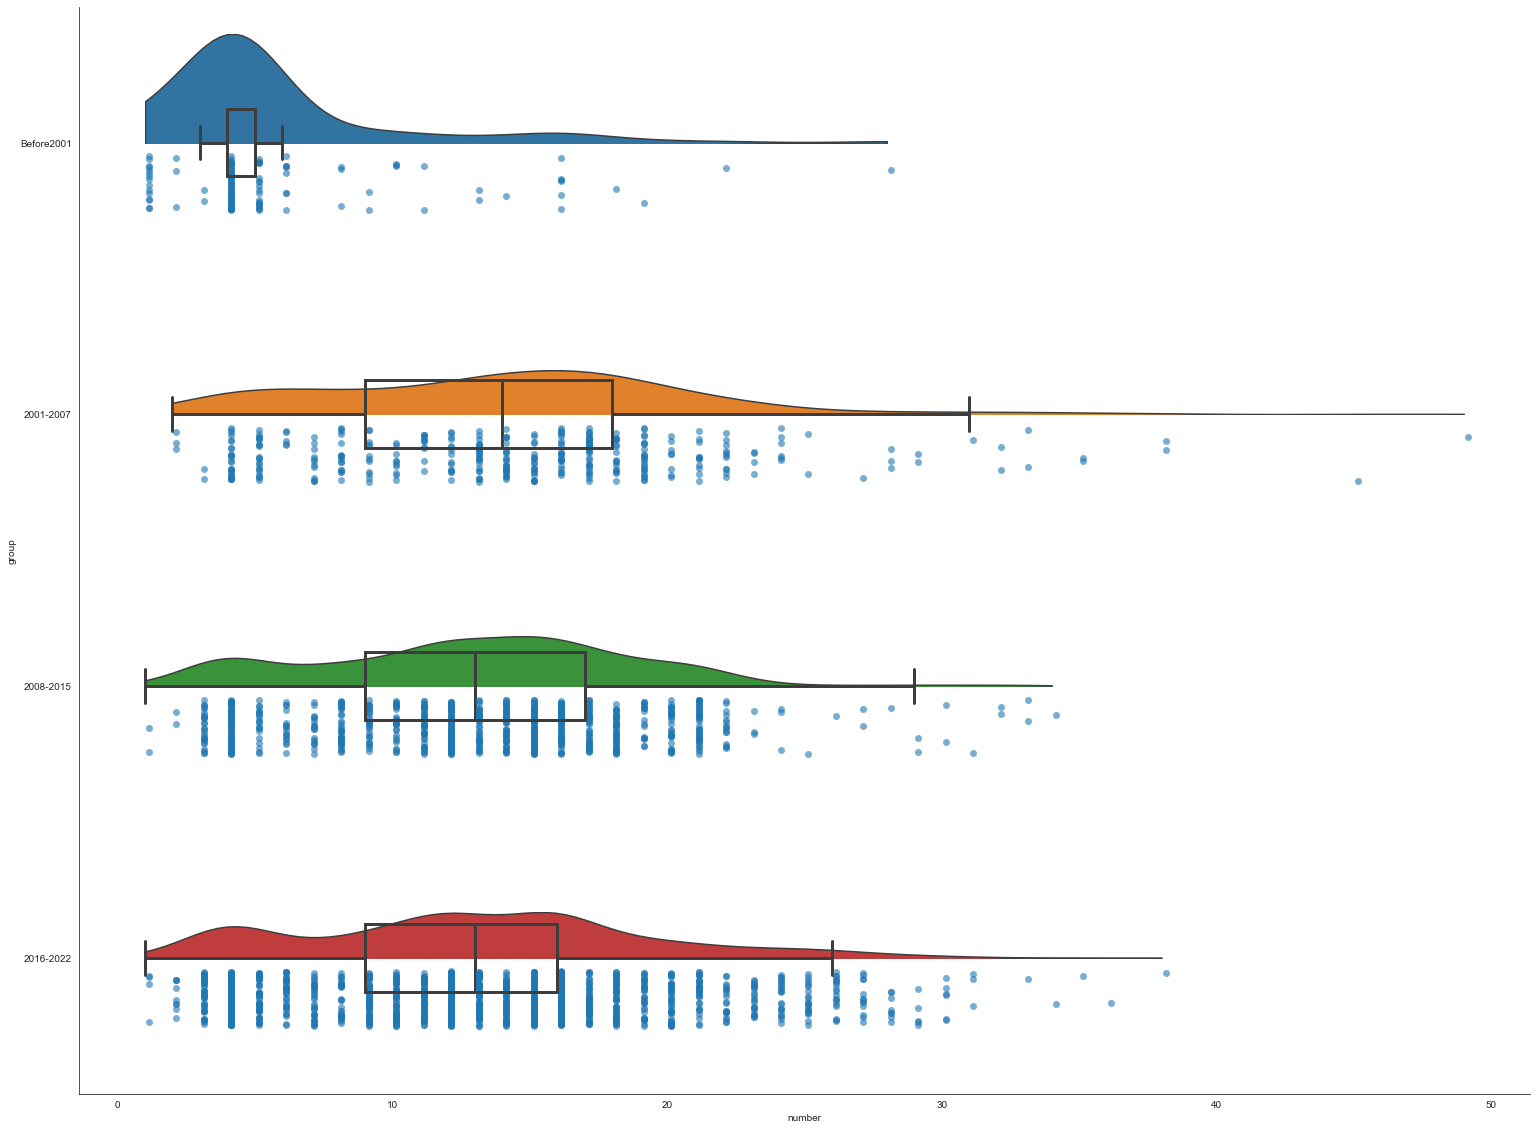

In [68]:
# color setting
colors_list = ['#2878B5',
          '#fff2df',
          '#F8AC8C',
          '#C82423',
         '#F1D77E',
          '#B1CE46',
          '#939417',
          '#E7EFFA',
          '#9AC9DB']


# read data
test_file = f'{base_dir}/时间段ARG.txt'
save_file = f'{base_dir}/时间段ARG.eps'

print(f'Processing: {os.path.basename(test_file)}')
#plot_df = read_df_file(test_file)

plot_df, header = read_tsv_file(test_file)

colors = {head: colors_list[idx] for idx, head in enumerate(header)}

print(colors)

# start to plot
plt.figure(figsize=(26, 20))

# Create violin plots without mini-boxplots inside.
ax = sns.violinplot(x='number', y='group', data=plot_df,
                    cut=0, inner=None)


# Clip the lower half of each violin.
for item in ax.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax.transData))


# Create strip plots with partially transparent points of different colors depending on the group.
num_items = len(ax.collections)
sns.stripplot(x='number', y='group', data=plot_df,
              alpha=0.6, size=7)

# Shift each strip plot strictly below the correponding volin.
for item in ax.collections[num_items:]:
    item.set_offsets(item.get_offsets() + 0.15)

# Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
sns.boxplot(x='number', y='group', data=plot_df, width=0.25,
            showfliers=False, 
            meanprops=dict(marker='o', markerfacecolor='darkorange',
                           markersize=10, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), 
                          linewidth=3, zorder=3),
            whiskerprops=dict(linewidth=3),
            capprops=dict(linewidth=3),
            medianprops=dict(linewidth=3))

# Hide the top and right spines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the remaining spines (bottom and left).
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


plt.savefig(save_file, dpi=630, bbox_inches='tight')
print(f'{save_file} saved.')

